In [87]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('/Users/anshulpattoo/Desktop/CISC 251/Project/Python scripts/Spreadsheets/modifiedwinners.csv', index_col=0)
features = df.iloc[:, :817]
features

,people_NNS,america_NP,make_VB,president_NN,country_NN,going_VBG,us_PPO,american_JJ,new_JJ,years_NNS,...,equal_JJ,east_NR,walk_VB,morning_NN,decision_NN,led_VBD,september_NP,areas_NNS,outstanding_JJ,streets_NNS
0,0.003062,0.003253,0.002679,0.002296,0.003062,0.001339,0.000574,0.004018,0.006506,0.002105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000191
1,0.011148,0.001423,0.001898,0.002372,0.005218,0.003795,0.000237,0.001660,0.000712,0.004744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000237,0.0,0.000000
2,0.005772,0.007564,0.002190,0.002588,0.003782,0.001592,0.004976,0.002986,0.004976,0.000995,...,0.000199,0.000000,0.000000,0.000000,0.000199,0.000000,0.0,0.000000,0.0,0.000398
3,0.000960,0.000960,0.002400,0.004321,0.000480,0.000000,0.000960,0.001920,0.009602,0.000480,...,0.000000,0.000480,0.000000,0.000000,0.000000,0.000000,0.0,0.000480,0.0,0.000000
4,0.005483,0.000000,0.000000,0.008772,0.000000,0.000000,0.001097,0.005483,0.001097,0.001097,...,0.000000,0.002193,0.000000,0.000000,0.001097,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.005326,0.001664,0.001332,0.002663,0.001664,0.000333,0.001664,0.001664,0.001332,0.000999,...,0.000000,0.001332,0.000000,0.000333,0.000000,0.000000,0.0,0.000000,0.0,0.000000
427,0.007930,0.002390,0.002281,0.004128,0.001303,0.005757,0.001412,0.000978,0.000869,0.001955,...,0.000000,0.000109,0.000000,0.000000,0.000109,0.000000,0.0,0.000000,0.0,0.000000
428,0.008583,0.003121,0.004013,0.006019,0.002452,0.006242,0.001338,0.001115,0.000780,0.004570,...,0.000000,0.000223,0.000000,0.000000,0.000111,0.000111,0.0,0.000000,0.0,0.000000
429,0.003315,0.003315,0.003803,0.005070,0.000878,0.005265,0.004193,0.000585,0.000390,0.002633,...,0.000000,0.001072,0.000293,0.000000,0.000098,0.000000,0.0,0.000000,0.0,0.000293


In [81]:
#Separating out the features
features = df.iloc[:, :817]

#Separating out the target
target = df.iloc[:, 817]

#Standardizing the features
features = StandardScaler().fit_transform(features)

In [82]:
from sklearn.decomposition import PCA

#I want a PCA: two principal components.
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
principalDf

,PC1,PC2
0,-0.391882,5.846348
1,-3.757158,-4.052775
2,2.175448,-2.023560
3,9.950731,3.366879
4,12.201329,1.832389
...,...,...
426,6.344594,-1.772359
427,-4.140516,-2.732611
428,-2.684408,-2.922231
429,2.440451,-3.591723


In [83]:
from sklearn.mixture import GaussianMixture

EM = GaussianMixture(n_components = 2) 
EM.fit(principalDf)

clusters = EM.predict(principalDf)

clusters = EM.predict_proba(principalDf)

# print((clusters == 0).sum())
# print((clusters == 1).sum())

winnersDf = principalDf.assign(winners = df.iloc[:, 817].values)

clusters = clusters.tolist()
for i in range(len(clusters)):
    clusters[i] = max(clusters[i])
clusters
clustersDf = principalDf.assign(clusters = clusters)
clustersDf

,PC1,PC2,clusters
0,-0.391882,5.846348,0.883460
1,-3.757158,-4.052775,0.808564
2,2.175448,-2.023560,0.946034
3,9.950731,3.366879,0.999287
4,12.201329,1.832389,0.999956
...,...,...,...
426,6.344594,-1.772359,0.997876
427,-4.140516,-2.732611,0.834447
428,-2.684408,-2.922231,0.652953
429,2.440451,-3.591723,0.958263


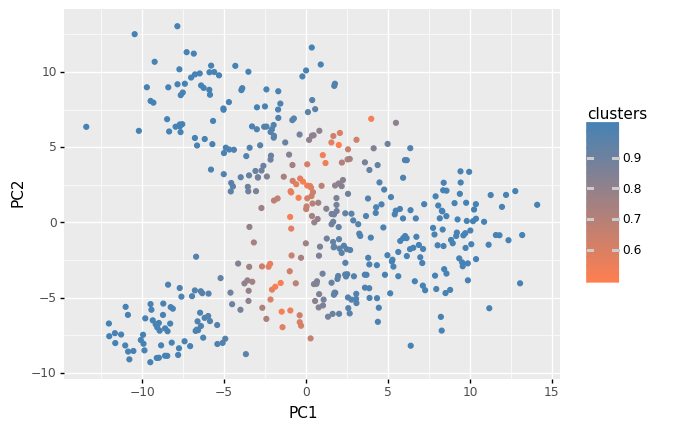

<ggplot: (301931591)>

In [84]:
from plotnine import *
ggplot(clustersDf, aes(x = "PC1", y = "PC2", color = "clusters")) + geom_point() + scale_colour_gradient(low="coral", high="steelblue")

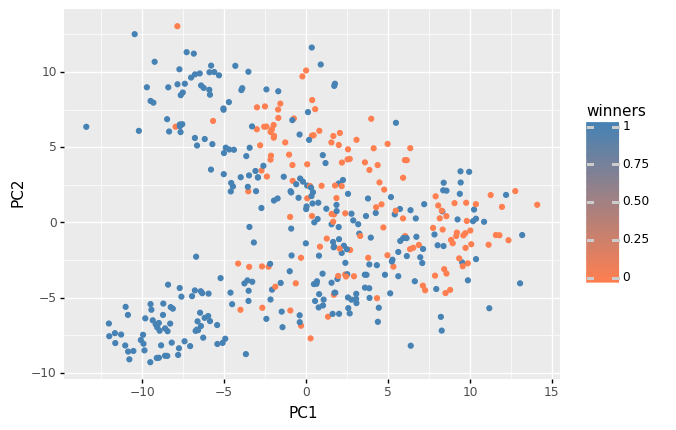

<ggplot: (312360014)>

In [85]:
(ggplot(winnersDf, aes(x = "PC1", y = "PC2", color = "winners")) 
+ geom_point()) + scale_colour_gradient(low="coral", high="steelblue")